## Exercise 2.11

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.rcParams['figure.figsize'] = (6.0, 6.0) # set default size of plots

%load_ext autoreload
%autoreload 2

In [2]:
from modules.multi_armed_bandit import MultiArmedBandit
from modules.player import *

def play(bandit, num_steps=200000, last_steps_for_average=100000,
         epsilon=0.0,
         alpha_css=0.0,
         q_0=0.0,
         c=0.0,
         alpha_gb=0.0):
    vals = np.zeros(num_steps)

    player = Player(bandit,
                    epsilon=epsilon,
                    alpha_css=alpha_css,
                    q_0=q_0,
                    c=c,
                    alpha_gb=alpha_gb)

    for i in range(num_steps):
        val, _, _ = player.draw()
        vals[i] = val
    #return np.mean(vals[0:last_steps_for_average])
    return np.mean(vals[-last_steps_for_average:])

In [3]:
bandit=MultiArmedBandit()
generators = [lambda epsilon: play(bandit=bandit, epsilon=epsilon),    # S.avg eps-greedy
              lambda alpha_gb: play(bandit=bandit, alpha_gb=alpha_gb), # Gradient
              lambda c: play(bandit=bandit, alpha_css=0.1, c=c),       # UCB   
              lambda q_0: play(bandit=bandit, alpha_css=0.1, q_0=q_0), # Optimistic initial
              lambda epsilon: play(bandit=bandit, epsilon=epsilon,     
                                   alpha_css=0.1)]

parameters = [np.arange(-7, -1, dtype=np.float), # S.avg eps-greedy
              np.arange(-5, 2, dtype=np.float),  # Gradient
              np.arange(-4, 5, dtype=np.float),  # UCB
              np.arange(-2, 5, dtype=np.float),  # Optimistic initial
              np.arange(-8, -1, dtype=np.float)] # CSS eps-greedy

In [4]:
labels = ['AvgEPS-G', 'GB', 'UCB', 'INIT', 'CSS-EPS-G']
rewards_for_algorithms = []
for generator, parameter in zip(generators, parameters):
    rewards = [generator(2**param) for param in parameter]
    rewards_for_algorithms.append(rewards)

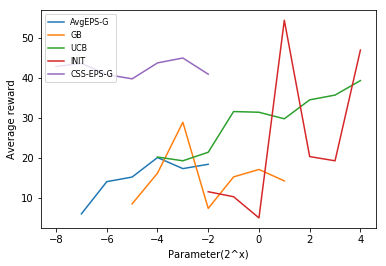

In [5]:
for label, parameter, rewards in zip(labels, parameters, rewards_for_algorithms):
    plt.plot(parameter, rewards, label=label)
plt.xlabel('Parameter(2^x)')
plt.ylabel('Average reward')
plt.legend(loc='upper left', prop={'size': 8})